In [78]:
import pandas as pd
import numpy as np
france = pd.read_excel ('/Users/carriechen/Desktop/EC1B1 project/France.xlsx') 
#importing the raw French data from IMF

In [79]:
US = pd.read_excel ('/Users/carriechen/Desktop/EC1B1 project/USCPI.xlsx')
#importing the US CPI data, ready to merge the 2 dataframes

In [80]:
merged_df = pd.concat([france, US], axis=1)
#merged the 2 dataframes such that the US CPI column is added
pd.options.display.max_rows = None
print(merged_df)


        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [81]:
import numpy as np
#this is to take the natural log of the exchange rate column.
merged_df['(i) France: Natural log of the Exchange Rate per U.S. Dollar'] = np.log(merged_df['France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'])    
print(merged_df)

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [82]:
#to find the difference between a month and the following month, I took the column and duplicated it with a small difference - I shifted every row down by one position. Therefore, if the first data entry (ie from teh first month) is in row 0, it is now in row 1
merged_df["Shifted Natural log of the Exchange Rate per U.S. Dollar"] = merged_df["(i) France: Natural log of the Exchange Rate per U.S. Dollar"].shift(1)
#i then created a new column, one for the difference between the consecutive months. 
#I subtracted the original column values from the shifted ones. this gives the change from one month to the next
#for example: if row 1 from the non-shifted column contains the data for month 2, row 1 contains the data for month 1 in the shifted column. therefore, subtracting them gives the monthly change
merged_df["(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar"] = merged_df["(i) France: Natural log of the Exchange Rate per U.S. Dollar"] - merged_df["Shifted Natural log of the Exchange Rate per U.S. Dollar"]
print(merged_df)
#row 0 gives a NaN value since the data for the month 0 (ie December 1959), the one before Jan 1960 where our data starts, does not exist.

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [83]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted French CPI"] = merged_df["France: Prices, Consumer Price Index"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly difference in the inflation rate"] = merged_df["France: Prices, Consumer Price Index"] - merged_df["Shifted French CPI"]

In [84]:
merged_df['(iv) France: Natural log of Industrial Production'] = np.log(merged_df['France: Economic Activity, Industrial Production, Index'])    
#created a new column where I have taken logs of each value in the industrial production column

In [85]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted French Industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly growth in industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"] - merged_df["Shifted French Industrial production"]

In [86]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down 12 rows
merged_df["Shifted 12 rows French Industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"].shift(12)
#I then subtracted these shifted values from the original data column
merged_df["(vi) France: Industrial production growth vs previous year"] = merged_df["(iv) France: Natural log of Industrial Production"] - merged_df["Shifted 12 rows French Industrial production"]

In [87]:
merged_df['(i) US: Natural log of CPI'] = np.log(merged_df['United States: Prices, Consumer Price Index'])    

In [88]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted US natural log CPI"] = merged_df["United States: Prices, Consumer Price Index"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly difference in the inflation rate"] = merged_df["United States: Prices, Consumer Price Index"] - merged_df["Shifted US natural log CPI"]

In [89]:
stripped_df = merged_df.drop(['Shifted Natural log of the Exchange Rate per U.S. Dollar',
                             'Shifted French CPI', 
                             'Shifted French Industrial production', 
                             'Shifted 12 rows French Industrial production', 
                             'Shifted US natural log CPI'], 
                            axis=1)
print(stripped_df)

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [90]:
stripped_df.isnull().sum() 
# This is to check the number of missing values in the dataset.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             0
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     0
France: Prices, Consumer Price Index                                                0
United States: Prices, Consumer Price Index                                         0
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        0
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           1
(iii) Monthly difference in the inflation rate                                      1
(iv) France: Natural log of Industrial Production                                   0
(iii) Monthly growth in industrial production                                       1
(vi) France: Industrial production growth vs previous year                         12
(i) US: Natural log of CPI                            

In [91]:
def outlier_limits(col):
    Top99_5, Lowest0_5 = np.nanpercentile(col, [99.5, 0.5])
    Upper_limit = Top99_5
    Lower_limit = Lowest0_5
    return Upper_limit, Lower_limit

#We defined top 0.5% and bottom 0.5% as outliers


In [92]:
for column in stripped_df.columns:
    if stripped_df[column].dtype != 'object':
        Upper_limit, Lower_limit = outlier_limits(stripped_df[column])
        stripped_df[column] = np.where((stripped_df[column] > Upper_limit)| (stripped_df[column] < Lower_limit), np.nan, stripped_df[column])
        
 # We want to make these outliers missing value

In [93]:
stripped_df.isnull().sum()
# this tells us the number of missing values after converting outliers into missing value. 
# The difference in missing value after and before tells us the number of outliers identified.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             4
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     4
France: Prices, Consumer Price Index                                                4
United States: Prices, Consumer Price Index                                         3
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        4
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           5
(iii) Monthly difference in the inflation rate                                      5
(iv) France: Natural log of Industrial Production                                   4
(iii) Monthly growth in industrial production                                       5
(vi) France: Industrial production growth vs previous year                         16
(i) US: Natural log of CPI                            

In [94]:
new_stripped_df = stripped_df.interpolate()
new_stripped_df.isnull().sum()
#Using linear interpolation, we can fill in the missing values.
#Checking the number of missing values after linear interpolation.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             0
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     0
France: Prices, Consumer Price Index                                                1
United States: Prices, Consumer Price Index                                         1
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        0
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           1
(iii) Monthly difference in the inflation rate                                      1
(iv) France: Natural log of Industrial Production                                   0
(iii) Monthly growth in industrial production                                       1
(vi) France: Industrial production growth vs previous year                         12
(i) US: Natural log of CPI                            

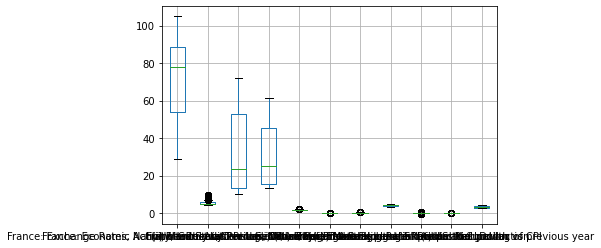

In [95]:
boxplot_all = new_stripped_df.boxplot()


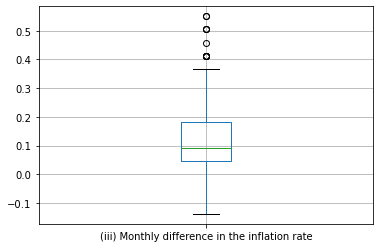

In [96]:
boxplot_1 = new_stripped_df.boxplot(column='(iii) Monthly difference in the inflation rate')

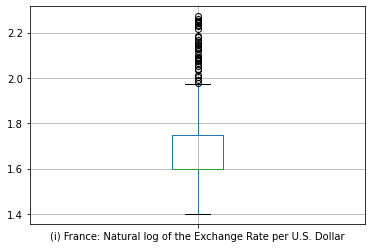

In [97]:
boxplot_1 = new_stripped_df.boxplot(column='(i) France: Natural log of the Exchange Rate per U.S. Dollar')

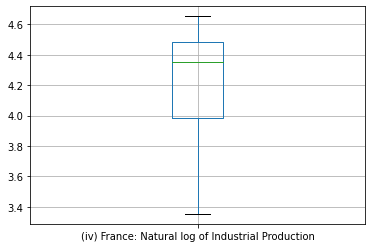

In [98]:
boxplot_1 = new_stripped_df.boxplot(column='(iv) France: Natural log of Industrial Production')

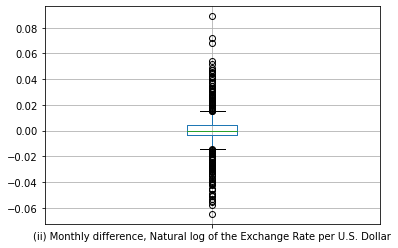

In [99]:
boxplot = new_stripped_df.boxplot(column='(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar')

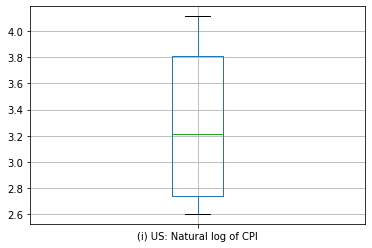

In [100]:
boxplot_2 = new_stripped_df.boxplot(column='(i) US: Natural log of CPI')

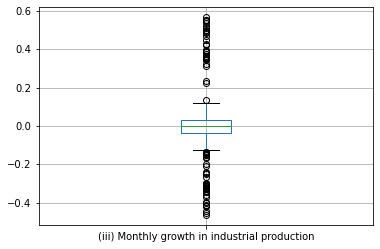

In [101]:
boxplot = new_stripped_df.boxplot(column='(iii) Monthly growth in industrial production')

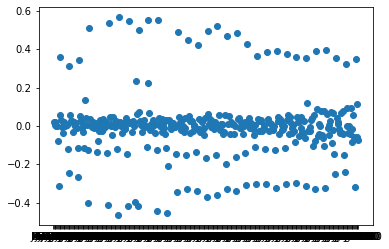

In [102]:
import matplotlib.pyplot as plt
x = new_stripped_df["Month"]
y = new_stripped_df["(iii) Monthly growth in industrial production"]
plt.scatter(x, y)
plt.show()

In [103]:
#creating a new column for real exchange rates. formula from LT 5 is nominal*price in US / price in France
new_stripped_df['Nominal exchange rate * US prices'] = new_stripped_df['France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'] * new_stripped_df['France: Prices, Consumer Price Index']
new_stripped_df['Monthly real exchange rate'] = new_stripped_df['Nominal exchange rate * US prices'] / new_stripped_df['United States: Prices, Consumer Price Index']
print(new_stripped_df['Monthly real exchange rate'])

0            NaN
1       3.796497
2       3.796497
3       3.789430
4       3.780726
5       3.773737
6       3.779520
7       3.814221
8       3.820004
9       3.800112
10      3.811601
11      3.820219
12      3.823091
13      3.825963
14      3.823091
15      3.820219
16      3.811601
17      3.802984
18      3.806162
19      3.841796
20      3.848960
21      3.891758
22      3.931702
23      3.945971
24      3.971647
25      3.962485
26      3.986672
27      3.981506
28      3.993557
29      4.009628
30      4.012413
31      4.008410
32      4.011190
33      4.019172
34      4.043116
35      4.059081
36      4.091011
37      4.114959
38      4.113404
39      4.121360
40      4.137273
41      4.151507
42      4.153793
43      4.169602
44      4.197266
45      4.191517
46      4.203338
47      4.197588
48      4.213295
49      4.217220
50      4.221148
51      4.225073
52      4.229001
53      4.223187
54      4.221311
55      4.242756
56      4.248622
57      4.260325
58      4.2466

In [104]:
final_df = new_stripped_df.drop(['Nominal exchange rate * US prices'], axis=1)

In [105]:
final_df.rename(columns={'France: Economic Activity, Industrial Production, Index': 'France: Industrial Production',
                         'France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'France: Nominal ER, USD',
                         'France: Prices, Consumer Price Index': 'France: CPI',
                         'United States: Prices, Consumer Price Index': 'US: CPI',
                         '(i) France: Natural log of the Exchange Rate per U.S. Dollar': '(i) France: Nlog ER, USD',
                         '(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar': '(ii) France: Monthly difference, Nlog ER, USD',
                         '(iv) France: Natural log of Industrial Production': '(iv) France: Nlog Industrial Production',
                         '(iii) Monthly growth in industrial production': '(v) France: Monthly growth in industrial production',
                         '(i) US: Natural log of CPI': 'US: Nlog CPI',
                         'Monthly real exchange rate': 'France: Monthly real ER'}, inplace=True)

#Note that 'ER' stands for Exchange rate
#Note that 'Nlog' stands for Natural log of
#This step was just to rename some lengthy column names which were a bit of a mouthful.

print(final_df)

        Month  France: Industrial Production  France: Nominal ER, USD  \
0    Jan 1960                      37.698844                 4.937060   
1    Feb 1960                      38.582145                 4.937060   
2    Mar 1960                      38.718038                 4.937060   
3    Apr 1960                      39.601339                 4.937060   
4    May 1960                      39.635312                 4.937060   
5    Jun 1960                      39.635312                 4.937060   
6    Jul 1960                      36.611704                 4.937060   
7    Aug 1960                      37.472357                 4.937060   
8    Sep 1960                      38.333009                 4.937060   
9    Oct 1960                      40.586560                 4.937060   
10   Nov 1960                      41.956809                 4.937060   
11   Dec 1960                      41.820917                 4.937060   
12   Jan 1961                      40.405370       

In [107]:
final_df.index = final_df['Month']
final_df = final_df.drop(['Month'], axis=1)
print(final_df)

          France: Industrial Production  France: Nominal ER, USD  France: CPI  \
Month                                                                           
Jan 1960                      37.698844                 4.937060          NaN   
Feb 1960                      38.582145                 4.937060    10.367998   
Mar 1960                      38.718038                 4.937060    10.367998   
Apr 1960                      39.601339                 4.937060    10.383900   
May 1960                      39.635312                 4.937060    10.360048   
Jun 1960                      39.635312                 4.937060    10.375949   
Jul 1960                      36.611704                 4.937060    10.391851   
Aug 1960                      37.472357                 4.937060    10.487262   
Sep 1960                      38.333009                 4.937060    10.503163   
Oct 1960                      40.586560                 4.937060    10.519066   
Nov 1960                    

In [108]:
final_df

,France: Industrial Production,"France: Nominal ER, USD",France: CPI,US: CPI,"(i) France: Nlog ER, USD","(ii) France: Monthly difference, Nlog ER, USD",(iii) Monthly difference in the inflation rate,(iv) France: Nlog Industrial Production,(v) France: Monthly growth in industrial production,(vi) France: Industrial production growth vs previous year,US: Nlog CPI,France: Monthly real ER
Month,,,,,,,,,,,,
Jan 1960,37.698844,4.937060,NaN,NaN,1.596770,NaN,NaN,3.629629,NaN,NaN,NaN,NaN
Feb 1960,38.582145,4.937060,10.367998,13.482806,1.596770,0.000000,4.585988e-02,3.652790,2.316018e-02,NaN,2.601415,3.796497
Mar 1960,38.718038,4.937060,10.367998,13.482806,1.596770,0.000000,0.000000e+00,3.656306,3.515972e-03,NaN,2.601415,3.796497
Apr 1960,39.601339,4.937060,10.383900,13.528666,1.596770,0.000000,4.585988e-02,3.678863,2.255735e-02,NaN,2.604811,3.789430
May 1960,39.635312,4.937060,10.360048,13.528666,1.596770,0.000000,0.000000e+00,3.679720,8.575104e-04,NaN,2.604811,3.780726
Jun 1960,39.635312,4.937060,10.375949,13.574526,1.596770,0.000000,4.585988e-02,3.679720,0.000000e+00,NaN,2.608195,3.773737
Jul 1960,36.611704,4.937060,10.391851,13.574526,1.596770,0.000000,0.000000e+00,3.600368,-7.935247e-02,NaN,2.608195,3.779520
Aug 1960,37.472357,4.937060,10.487262,13.574526,1.596770,0.000000,0.000000e+00,3.623340,-3.126325e-01,NaN,2.608195,3.814221
Sep 1960,38.333009,4.937060,10.503163,13.574526,1.596770,0.000000,0.000000e+00,3.646311,3.585759e-01,NaN,2.608195,3.820004
